### Load required libraries

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
from tensorflow.keras import regularizers
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Input
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Load the data

In [78]:
df = pd.read_csv('./data/creditcard.csv', index_col=0)
print(df.shape)
df.head()

(284807, 30)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Data check

In [79]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [80]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [81]:
df.isnull().values.any()

False

In [82]:
df = df.drop(['Amount'], axis=1)

### Train/test split

In [83]:
frauds = df[df.Class == 1]
#normal = df[df.Class == 0].sample(10000)
normal = df[df.Class == 0]
print("Frauds shape: {}".format(frauds.shape))
print("Normal shape: {}".format(normal.shape))

Frauds shape: (492, 29)
Normal shape: (284315, 29)


In [84]:
data = pd.concat([frauds, normal])
data.shape

(284807, 29)

In [85]:
X_train, X_test = train_test_split(data, test_size=0.3, random_state=42)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

X_test, y_test = X_test.drop(['Class'], axis=1).values, X_test['Class'].values

print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

X_train shape: (199013, 28)
X_test shape: (85443, 28)


### Visualize the data with TSNE and PCA

In [86]:
x1 = df[df.Class == 1]
x2 = df[df.Class == 0].sample(10000)

dfd = x1.append(x2)
x = dfd.drop(['Class'], axis=1)
y = dfd['Class'].values

SEED = 42

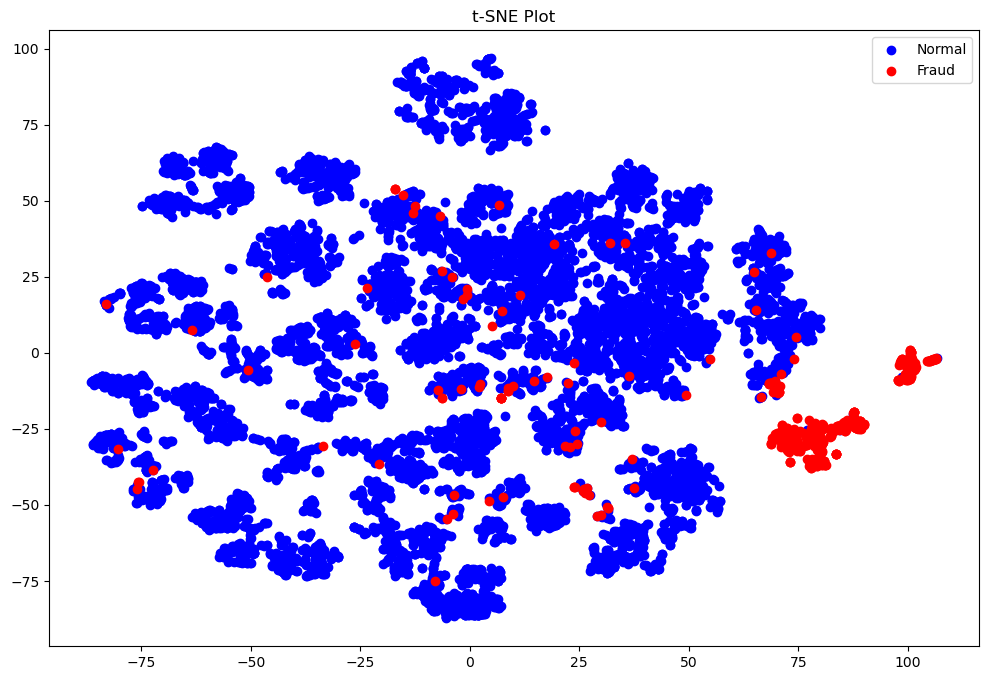

In [87]:
tsne = TSNE(n_components=2, random_state=SEED).fit_transform(x)
plt.figure(figsize=(12,8));
plt.scatter(tsne[np.where(y==0), 0], y=tsne[np.where(y==0), 1], color="blue", label='Normal')
plt.scatter(x=tsne[np.where(y==1), 0], y=tsne[np.where(y==1), 1], color="red", label='Fraud')
plt.title('t-SNE Plot')
plt.legend()
plt.show()

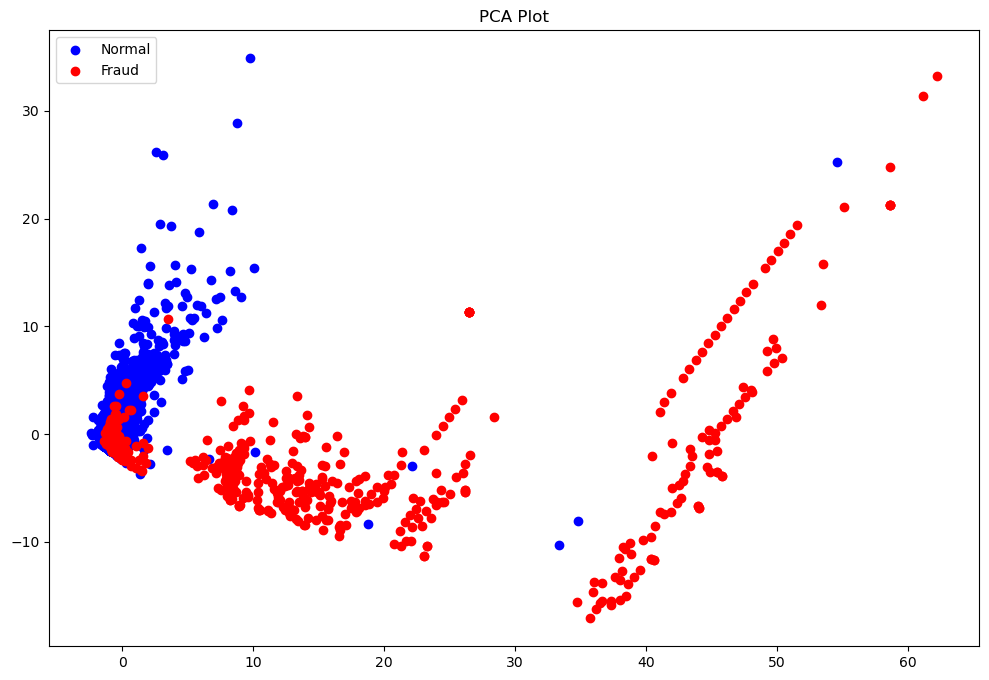

In [88]:
pca = PCA(n_components=2, random_state=SEED).fit_transform(x)
plt.figure(figsize=(12,8));
plt.scatter(pca[np.where(y==0), 0], y=pca[np.where(y==0), 1], color="blue", label='Normal')
plt.scatter(x=pca[np.where(y==1), 0], y=pca[np.where(y==1), 1], color="red", label='Fraud')
plt.title('PCA Plot')
plt.legend()
plt.show()

#### Normalize the data

In [89]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit_transform(X_train);
scaler.transform(X_test);

#### Add Noise in data

In [90]:
noise_factor = 0.5;
X_train_noise = X_train + noise_factor*np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noise = X_test + noise_factor*np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

In [91]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
Time,,,,,,,,,,,,,,,,,,,,,
1597.0,-0.447016,0.865305,1.317656,-0.031990,-0.049573,-0.348205,0.401046,0.327438,-0.328063,-0.324674,...,-0.222342,-0.051299,-0.195072,-0.612429,0.064959,0.109621,-0.366456,0.079036,0.242154,0.082075
153690.0,-0.776571,0.804383,0.849559,-0.617220,-0.054136,0.523930,-0.307065,0.847935,0.278560,-0.668078,...,0.459711,-0.072367,0.354584,1.058180,-0.304391,0.268749,0.006518,-0.070282,0.284993,0.138072
97031.0,2.053647,0.243291,-1.872014,0.596880,0.570019,-1.064779,0.229696,-0.460595,1.865564,-0.865344,...,-0.386951,-0.145679,0.021229,0.442260,-0.123783,-0.768147,0.323993,-0.103481,-0.033083,-0.038749
68508.0,1.180688,0.024251,0.955792,0.527480,-0.767446,-0.404405,-0.428924,0.069926,0.093850,0.079937,...,-0.035820,-0.063934,-0.032497,-0.117500,0.077052,0.340947,0.136221,0.195824,-0.009098,0.016719
11086.0,-0.182049,0.534337,1.317379,1.735990,-0.472466,1.531518,-0.724238,-1.384876,2.000744,-0.614165,...,0.734191,-0.434316,1.199651,-0.939429,-0.507470,-0.813763,1.148263,0.005315,0.268109,0.163228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75525.0,-1.057005,1.158519,1.232596,1.140679,-0.186492,0.407923,1.505036,-0.129395,-0.729305,0.218051,...,-1.265839,-0.504789,-0.299197,-1.010943,-0.088265,-0.561599,-0.365902,-0.510134,-0.182902,0.078162
158989.0,2.182974,-1.008460,-2.834986,-3.264015,0.830545,0.294460,-0.090330,-0.001023,0.272701,-0.272232,...,-0.174136,-0.679827,-0.144837,0.331923,0.031033,-0.945655,0.347180,-0.583293,0.053490,-0.086282
79704.0,1.306778,0.022181,-0.163723,-0.009640,-0.265932,-1.076554,0.210551,-0.192439,0.225730,-0.090900,...,0.474472,-0.140273,-0.487847,-1.571589,0.155160,-0.153331,0.103053,0.657813,-0.115548,-0.002626


In [92]:
X_train_noise

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
Time,,,,,,,,,,,,,,,,,,,,,
1597.0,-0.323057,1.735032,1.068918,-0.127013,0.235843,-0.680485,0.785280,0.409330,-0.844261,0.180253,...,0.289033,-0.860018,-0.578782,-1.471001,-1.283704,0.039039,-0.118770,0.306907,-0.341366,0.508668
153690.0,-0.612818,1.591838,0.555876,-0.614923,-0.098483,1.199139,1.088576,1.061508,0.207600,-1.136274,...,0.259777,-0.636595,-0.350867,0.473221,0.043382,0.464408,-0.299185,-0.308858,0.153686,0.518155
97031.0,1.095068,0.118829,-2.239820,0.699030,0.766293,-0.747458,0.161364,-1.328032,2.900347,-0.524629,...,-0.500526,-0.100826,0.343288,0.710743,-0.906113,-0.377294,1.187749,-0.313922,0.146724,0.192964
68508.0,1.375536,-0.454800,0.499678,0.276746,-0.714542,-0.543798,-0.311607,-0.922815,-0.401186,-0.514828,...,-0.730144,-1.509613,-1.016952,-0.660679,0.118202,0.804942,0.182882,0.088829,0.079381,0.667718
11086.0,-0.658679,0.344490,1.710337,1.576191,-1.536007,1.744658,-0.707156,-1.407786,1.117541,-0.185911,...,0.701750,-0.277800,1.161154,-0.294944,-0.525983,-0.984205,1.762021,0.196775,0.150670,0.978332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75525.0,-0.068661,1.125859,1.226549,1.152154,-1.082457,0.664834,1.454130,-0.219839,-0.701730,0.553917,...,-1.068942,-1.615738,-0.849937,-1.327102,-0.105151,-1.385030,-0.449163,-0.556843,-1.161126,-0.054463
158989.0,1.079264,-1.693027,-2.881037,-3.244256,0.574955,1.037247,0.307827,0.367160,-0.307537,-0.865589,...,-0.110649,-0.346465,-0.730316,-0.423884,-1.264937,-0.732392,0.870495,-0.479119,0.918662,-0.087473
79704.0,1.883073,-0.878441,-0.530665,0.180544,0.743265,-1.742142,0.589298,0.524038,0.513198,-0.219668,...,0.149507,-0.236071,-1.495176,-1.471129,0.313837,0.099967,0.214879,0.728579,0.439302,0.255119


### Denoising AutoEncoder Model

In [93]:
input_dim = X_train.shape[1]

input_layer = Input(shape=(input_dim, ))
encoder = Dense(14, activation="elu")(input_layer)

encoder = Dense(7, activation="elu")(encoder)

decoder = Dense(14, activation='elu')(encoder)
decoder = Dense(input_dim, activation='elu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [94]:
epochs = 100
batch_size = 32
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="fraudDAE.pth", verbose=0, save_best_only=True)

### Training

In [95]:
history = autoencoder.fit(np.array(X_train_noise), np.array(X_train),
                    epochs=epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_split=0.1,
                    callbacks=[checkpointer]).history

Epoch 1/100
5598/5598 [==============================] - ETA: 0s - loss: 0.6657 - accuracy: 0.5222INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 33s 5ms/step - loss: 0.6657 - accuracy: 0.5222 - val_loss: 0.5856 - val_accuracy: 0.5639
Epoch 2/100
5587/5598 [============================>.] - ETA: 0s - loss: 0.5945 - accuracy: 0.5652INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 33s 6ms/step - loss: 0.5950 - accuracy: 0.5652 - val_loss: 0.5578 - val_accuracy: 0.5820
Epoch 3/100
5598/5598 [==============================] - ETA: 0s - loss: 0.5711 - accuracy: 0.5786INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 27s 5ms/step - loss: 0.5711 - accuracy: 0.5786 - val_loss: 0.5401 - val_accuracy: 0.5955
Epoch 4/100
5591/5598 [============================>.] - ETA: 0s - loss: 0.5558 - accuracy: 0.5877INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 28s 5ms/step - loss: 0.5560 - accuracy: 0.5877 - val_loss: 0.5282 - val_accuracy: 0.5977
Epoch 5/100
5592/5598 [============================>.] - ETA: 0s - loss: 0.5477 - accuracy: 0.5912INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 28s 5ms/step - loss: 0.5476 - accuracy: 0.5912 - val_loss: 0.5204 - val_accuracy: 0.6029
Epoch 6/100
5583/5598 [============================>.] - ETA: 0s - loss: 0.5433 - accuracy: 0.5920INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 25s 4ms/step - loss: 0.5433 - accuracy: 0.5920 - val_loss: 0.5162 - val_accuracy: 0.6042
Epoch 7/100
5589/5598 [============================>.] - ETA: 0s - loss: 0.5403 - accuracy: 0.5929INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 24s 4ms/step - loss: 0.5403 - accuracy: 0.5929 - val_loss: 0.5138 - val_accuracy: 0.6037
Epoch 8/100
5598/5598 [==============================] - 18s 3ms/step - loss: 0.5390 - accuracy: 0.5938 - val_loss: 0.5147 - val_accuracy: 0.6000
Epoch 9/100
5598/5598 [==============================] - ETA: 0s - loss: 0.5367 - accuracy: 0.5943INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 23s 4ms/step - loss: 0.5367 - accuracy: 0.5943 - val_loss: 0.5126 - val_accuracy: 0.6055
Epoch 10/100
5583/5598 [============================>.] - ETA: 0s - loss: 0.5356 - accuracy: 0.5963INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 25s 4ms/step - loss: 0.5356 - accuracy: 0.5963 - val_loss: 0.5125 - val_accuracy: 0.6052
Epoch 11/100
5594/5598 [============================>.] - ETA: 0s - loss: 0.5351 - accuracy: 0.5963INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 24s 4ms/step - loss: 0.5351 - accuracy: 0.5962 - val_loss: 0.5105 - val_accuracy: 0.6053
Epoch 12/100
5588/5598 [============================>.] - ETA: 0s - loss: 0.5341 - accuracy: 0.5969INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 21s 4ms/step - loss: 0.5339 - accuracy: 0.5969 - val_loss: 0.5096 - val_accuracy: 0.6057
Epoch 13/100
5584/5598 [============================>.] - ETA: 0s - loss: 0.5326 - accuracy: 0.5975INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 22s 4ms/step - loss: 0.5325 - accuracy: 0.5976 - val_loss: 0.5083 - val_accuracy: 0.6080
Epoch 14/100
5598/5598 [==============================] - 20s 4ms/step - loss: 0.5325 - accuracy: 0.5978 - val_loss: 0.5095 - val_accuracy: 0.6046
Epoch 15/100
5593/5598 [============================>.] - ETA: 0s - loss: 0.5316 - accuracy: 0.5988INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 29s 5ms/step - loss: 0.5315 - accuracy: 0.5988 - val_loss: 0.5081 - val_accuracy: 0.6071
Epoch 16/100
5591/5598 [============================>.] - ETA: 0s - loss: 0.5310 - accuracy: 0.5985INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 24s 4ms/step - loss: 0.5310 - accuracy: 0.5985 - val_loss: 0.5064 - val_accuracy: 0.6058
Epoch 17/100
5594/5598 [============================>.] - ETA: 0s - loss: 0.5299 - accuracy: 0.5976INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 25s 4ms/step - loss: 0.5299 - accuracy: 0.5976 - val_loss: 0.5061 - val_accuracy: 0.6083
Epoch 18/100
5582/5598 [============================>.] - ETA: 0s - loss: 0.5281 - accuracy: 0.5977INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 27s 5ms/step - loss: 0.5281 - accuracy: 0.5978 - val_loss: 0.5028 - val_accuracy: 0.6087
Epoch 19/100
5594/5598 [============================>.] - ETA: 0s - loss: 0.5260 - accuracy: 0.5983INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 26s 5ms/step - loss: 0.5259 - accuracy: 0.5983 - val_loss: 0.5019 - val_accuracy: 0.6088
Epoch 20/100
5590/5598 [============================>.] - ETA: 0s - loss: 0.5240 - accuracy: 0.6004INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 24s 4ms/step - loss: 0.5239 - accuracy: 0.6004 - val_loss: 0.4999 - val_accuracy: 0.6123
Epoch 21/100
5588/5598 [============================>.] - ETA: 0s - loss: 0.5225 - accuracy: 0.6008INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 27s 5ms/step - loss: 0.5222 - accuracy: 0.6008 - val_loss: 0.4967 - val_accuracy: 0.6130
Epoch 22/100
5586/5598 [============================>.] - ETA: 0s - loss: 0.5213 - accuracy: 0.6015INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 33s 6ms/step - loss: 0.5211 - accuracy: 0.6016 - val_loss: 0.4965 - val_accuracy: 0.6101
Epoch 23/100
5583/5598 [============================>.] - ETA: 0s - loss: 0.5181 - accuracy: 0.6017INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 27s 5ms/step - loss: 0.5180 - accuracy: 0.6017 - val_loss: 0.4926 - val_accuracy: 0.6107
Epoch 24/100
5584/5598 [============================>.] - ETA: 0s - loss: 0.5147 - accuracy: 0.6016INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 25s 4ms/step - loss: 0.5153 - accuracy: 0.6017 - val_loss: 0.4908 - val_accuracy: 0.6091
Epoch 25/100
5590/5598 [============================>.] - ETA: 0s - loss: 0.5141 - accuracy: 0.6039INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 27s 5ms/step - loss: 0.5141 - accuracy: 0.6040 - val_loss: 0.4899 - val_accuracy: 0.6134
Epoch 26/100
5588/5598 [============================>.] - ETA: 0s - loss: 0.5117 - accuracy: 0.6048INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 24s 4ms/step - loss: 0.5115 - accuracy: 0.6048 - val_loss: 0.4863 - val_accuracy: 0.6135
Epoch 27/100
5581/5598 [============================>.] - ETA: 0s - loss: 0.5081 - accuracy: 0.6075INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 27s 5ms/step - loss: 0.5078 - accuracy: 0.6076 - val_loss: 0.4825 - val_accuracy: 0.6162
Epoch 28/100
5598/5598 [==============================] - 20s 4ms/step - loss: 0.5054 - accuracy: 0.6092 - val_loss: 0.4839 - val_accuracy: 0.6127
Epoch 29/100
5581/5598 [============================>.] - ETA: 0s - loss: 0.5051 - accuracy: 0.6090INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 28s 5ms/step - loss: 0.5048 - accuracy: 0.6089 - val_loss: 0.4807 - val_accuracy: 0.6104
Epoch 30/100
5597/5598 [============================>.] - ETA: 0s - loss: 0.5040 - accuracy: 0.6095INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 23s 4ms/step - loss: 0.5040 - accuracy: 0.6095 - val_loss: 0.4794 - val_accuracy: 0.6111
Epoch 31/100
5598/5598 [==============================] - 21s 4ms/step - loss: 0.5034 - accuracy: 0.6077 - val_loss: 0.4799 - val_accuracy: 0.6142
Epoch 32/100
5598/5598 [==============================] - 25s 5ms/step - loss: 0.5033 - accuracy: 0.6086 - val_loss: 0.4812 - val_accuracy: 0.6110
Epoch 33/100
5598/5598 [==============================] - 24s 4ms/step - loss: 0.5027 - accuracy: 0.6085 - val_loss: 0.4796 - val_accuracy: 0.6149
Epoch 34/100
5596/5598 [============================>.] - ETA: 0s - loss: 0.5020 - accuracy: 0.6087INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 27s 5ms/step - loss: 0.5020 - accuracy: 0.6086 - val_loss: 0.4777 - val_accuracy: 0.6174
Epoch 35/100
5598/5598 [==============================] - 23s 4ms/step - loss: 0.5024 - accuracy: 0.6097 - val_loss: 0.4832 - val_accuracy: 0.6146
Epoch 36/100
5598/5598 [==============================] - 24s 4ms/step - loss: 0.5020 - accuracy: 0.6090 - val_loss: 0.4794 - val_accuracy: 0.6155
Epoch 37/100
5589/5598 [============================>.] - ETA: 0s - loss: 0.5015 - accuracy: 0.6091INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 23s 4ms/step - loss: 0.5017 - accuracy: 0.6091 - val_loss: 0.4772 - val_accuracy: 0.6153
Epoch 38/100
5585/5598 [============================>.] - ETA: 0s - loss: 0.5013 - accuracy: 0.6097INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 28s 5ms/step - loss: 0.5010 - accuracy: 0.6097 - val_loss: 0.4768 - val_accuracy: 0.6173
Epoch 39/100
5598/5598 [==============================] - 22s 4ms/step - loss: 0.5006 - accuracy: 0.6095 - val_loss: 0.4772 - val_accuracy: 0.6118
Epoch 40/100
5596/5598 [============================>.] - ETA: 0s - loss: 0.5002 - accuracy: 0.6101INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 26s 5ms/step - loss: 0.5003 - accuracy: 0.6101 - val_loss: 0.4766 - val_accuracy: 0.6164
Epoch 41/100
5598/5598 [==============================] - 25s 4ms/step - loss: 0.5003 - accuracy: 0.6105 - val_loss: 0.4774 - val_accuracy: 0.6154
Epoch 42/100
5585/5598 [============================>.] - ETA: 0s - loss: 0.5001 - accuracy: 0.6101INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 27s 5ms/step - loss: 0.4999 - accuracy: 0.6101 - val_loss: 0.4763 - val_accuracy: 0.6192
Epoch 43/100
5598/5598 [==============================] - 19s 3ms/step - loss: 0.4997 - accuracy: 0.6108 - val_loss: 0.4772 - val_accuracy: 0.6196
Epoch 44/100
5598/5598 [==============================] - 18s 3ms/step - loss: 0.4995 - accuracy: 0.6114 - val_loss: 0.4770 - val_accuracy: 0.6181
Epoch 45/100
5596/5598 [============================>.] - ETA: 0s - loss: 0.4996 - accuracy: 0.6113INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 22s 4ms/step - loss: 0.4996 - accuracy: 0.6113 - val_loss: 0.4760 - val_accuracy: 0.6173
Epoch 46/100
5598/5598 [==============================] - 22s 4ms/step - loss: 0.4995 - accuracy: 0.6125 - val_loss: 0.4786 - val_accuracy: 0.6143
Epoch 47/100
5598/5598 [==============================] - 21s 4ms/step - loss: 0.4993 - accuracy: 0.6113 - val_loss: 0.4776 - val_accuracy: 0.6165
Epoch 48/100
5598/5598 [==============================] - 21s 4ms/step - loss: 0.4993 - accuracy: 0.6114 - val_loss: 0.4765 - val_accuracy: 0.6175
Epoch 49/100
5587/5598 [============================>.] - ETA: 0s - loss: 0.4994 - accuracy: 0.6109INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 26s 5ms/step - loss: 0.4991 - accuracy: 0.6109 - val_loss: 0.4759 - val_accuracy: 0.6195
Epoch 50/100
5585/5598 [============================>.] - ETA: 0s - loss: 0.4985 - accuracy: 0.6121INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 27s 5ms/step - loss: 0.4987 - accuracy: 0.6121 - val_loss: 0.4751 - val_accuracy: 0.6193
Epoch 51/100
5584/5598 [============================>.] - ETA: 0s - loss: 0.4987 - accuracy: 0.6118INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 24s 4ms/step - loss: 0.4986 - accuracy: 0.6117 - val_loss: 0.4751 - val_accuracy: 0.6184
Epoch 52/100
5598/5598 [==============================] - 23s 4ms/step - loss: 0.4982 - accuracy: 0.6136 - val_loss: 0.4752 - val_accuracy: 0.6209
Epoch 53/100
5579/5598 [============================>.] - ETA: 0s - loss: 0.4971 - accuracy: 0.6151INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 25s 4ms/step - loss: 0.4974 - accuracy: 0.6151 - val_loss: 0.4745 - val_accuracy: 0.6214
Epoch 54/100
5579/5598 [============================>.] - ETA: 0s - loss: 0.4980 - accuracy: 0.6150INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 27s 5ms/step - loss: 0.4976 - accuracy: 0.6150 - val_loss: 0.4732 - val_accuracy: 0.6201
Epoch 55/100
5598/5598 [==============================] - 24s 4ms/step - loss: 0.4975 - accuracy: 0.6152 - val_loss: 0.4747 - val_accuracy: 0.6235
Epoch 56/100
5598/5598 [==============================] - 22s 4ms/step - loss: 0.4974 - accuracy: 0.6149 - val_loss: 0.4737 - val_accuracy: 0.6206
Epoch 57/100
5598/5598 [==============================] - 23s 4ms/step - loss: 0.4969 - accuracy: 0.6158 - val_loss: 0.4743 - val_accuracy: 0.6191
Epoch 58/100
5598/5598 [==============================] - 23s 4ms/step - loss: 0.4972 - accuracy: 0.6160 - val_loss: 0.4743 - val_accuracy: 0.6242
Epoch 59/100
5581/5598 [============================>.] - ETA: 0s - loss: 0.4974 - accuracy: 0.6154INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 28s 5ms/step - loss: 0.4974 - accuracy: 0.6154 - val_loss: 0.4732 - val_accuracy: 0.6213
Epoch 60/100
5598/5598 [==============================] - 22s 4ms/step - loss: 0.4968 - accuracy: 0.6167 - val_loss: 0.4758 - val_accuracy: 0.6227
Epoch 61/100
5598/5598 [==============================] - 25s 5ms/step - loss: 0.4971 - accuracy: 0.6154 - val_loss: 0.4765 - val_accuracy: 0.6188
Epoch 62/100
5598/5598 [==============================] - 24s 4ms/step - loss: 0.4967 - accuracy: 0.6153 - val_loss: 0.4733 - val_accuracy: 0.6198
Epoch 63/100
5598/5598 [==============================] - 23s 4ms/step - loss: 0.4968 - accuracy: 0.6153 - val_loss: 0.4732 - val_accuracy: 0.6212
Epoch 64/100
5598/5598 [==============================] - 22s 4ms/step - loss: 0.4965 - accuracy: 0.6153 - val_loss: 0.4740 - val_accuracy: 0.6160
Epoch 65/100
5598/5598 [==============================] - 22s 4ms/step - loss: 0.4970 - accuracy: 0.6154 - val_loss: 0.4753 - val_a

INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 24s 4ms/step - loss: 0.4971 - accuracy: 0.6154 - val_loss: 0.4728 - val_accuracy: 0.6182
Epoch 71/100
5598/5598 [==============================] - 22s 4ms/step - loss: 0.4965 - accuracy: 0.6157 - val_loss: 0.4752 - val_accuracy: 0.6192
Epoch 72/100
5598/5598 [==============================] - 19s 3ms/step - loss: 0.4964 - accuracy: 0.6162 - val_loss: 0.4749 - val_accuracy: 0.6176
Epoch 73/100
5598/5598 [==============================] - 19s 3ms/step - loss: 0.4966 - accuracy: 0.6158 - val_loss: 0.4735 - val_accuracy: 0.6201
Epoch 74/100
5598/5598 [==============================] - 18s 3ms/step - loss: 0.4964 - accuracy: 0.6160 - val_loss: 0.4732 - val_accuracy: 0.6206
Epoch 75/100
5598/5598 [==============================] - 19s 3ms/step - loss: 0.4969 - accuracy: 0.6161 - val_loss: 0.4737 - val_accuracy: 0.6213
Epoch 76/100
5598/5598 [==============================] - 18s 3ms/step - loss: 0.4965 - accuracy: 0.6156 - val_loss: 0.4734 - val_a

INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 25s 4ms/step - loss: 0.4967 - accuracy: 0.6153 - val_loss: 0.4727 - val_accuracy: 0.6167
Epoch 84/100
5598/5598 [==============================] - 21s 4ms/step - loss: 0.4961 - accuracy: 0.6160 - val_loss: 0.4740 - val_accuracy: 0.6223
Epoch 85/100
5590/5598 [============================>.] - ETA: 0s - loss: 0.4963 - accuracy: 0.6153INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 23s 4ms/step - loss: 0.4964 - accuracy: 0.6153 - val_loss: 0.4726 - val_accuracy: 0.6187
Epoch 86/100
5598/5598 [==============================] - 23s 4ms/step - loss: 0.4962 - accuracy: 0.6155 - val_loss: 0.4735 - val_accuracy: 0.6193
Epoch 87/100
5598/5598 [==============================] - 21s 4ms/step - loss: 0.4962 - accuracy: 0.6161 - val_loss: 0.4728 - val_accuracy: 0.6219
Epoch 88/100
5598/5598 [==============================] - 19s 3ms/step - loss: 0.4963 - accuracy: 0.6159 - val_loss: 0.4731 - val_accuracy: 0.6220
Epoch 89/100
5598/5598 [==============================] - 23s 4ms/step - loss: 0.4965 - accuracy: 0.6163 - val_loss: 0.4737 - val_accuracy: 0.6194
Epoch 90/100
5598/5598 [==============================] - 22s 4ms/step - loss: 0.4961 - accuracy: 0.6159 - val_loss: 0.4744 - val_accuracy: 0.6188
Epoch 91/100
5598/5598 [==============================] - 22s 4ms/step - loss: 0.4967 - accuracy: 0.6150 - val_loss: 0.4735 - val_a

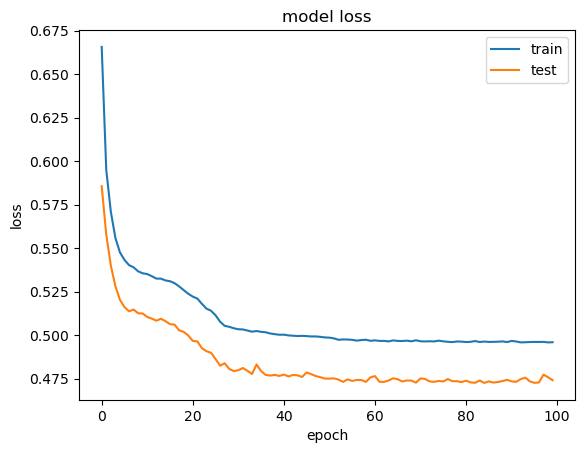

In [96]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

### Test

In [97]:
autoencoder = load_model('fraudDAE.pth')

In [98]:
predictions = autoencoder.predict(X_test_noise)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

2671/2671 [==============================] - 8s 3ms/step


,reconstruction_error,true_class
count,85443.000000,85443.00000
mean,0.523287,0.00165
std,3.345818,0.04059
min,0.023012,0.00000
25%,0.151854,0.00000
50%,0.230090,0.00000
75%,0.376643,0.00000
max,385.941973,1.00000


In [99]:
threshold = 2.9

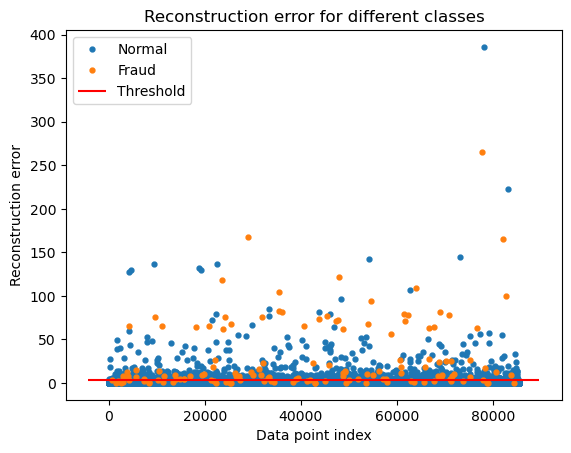

In [100]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

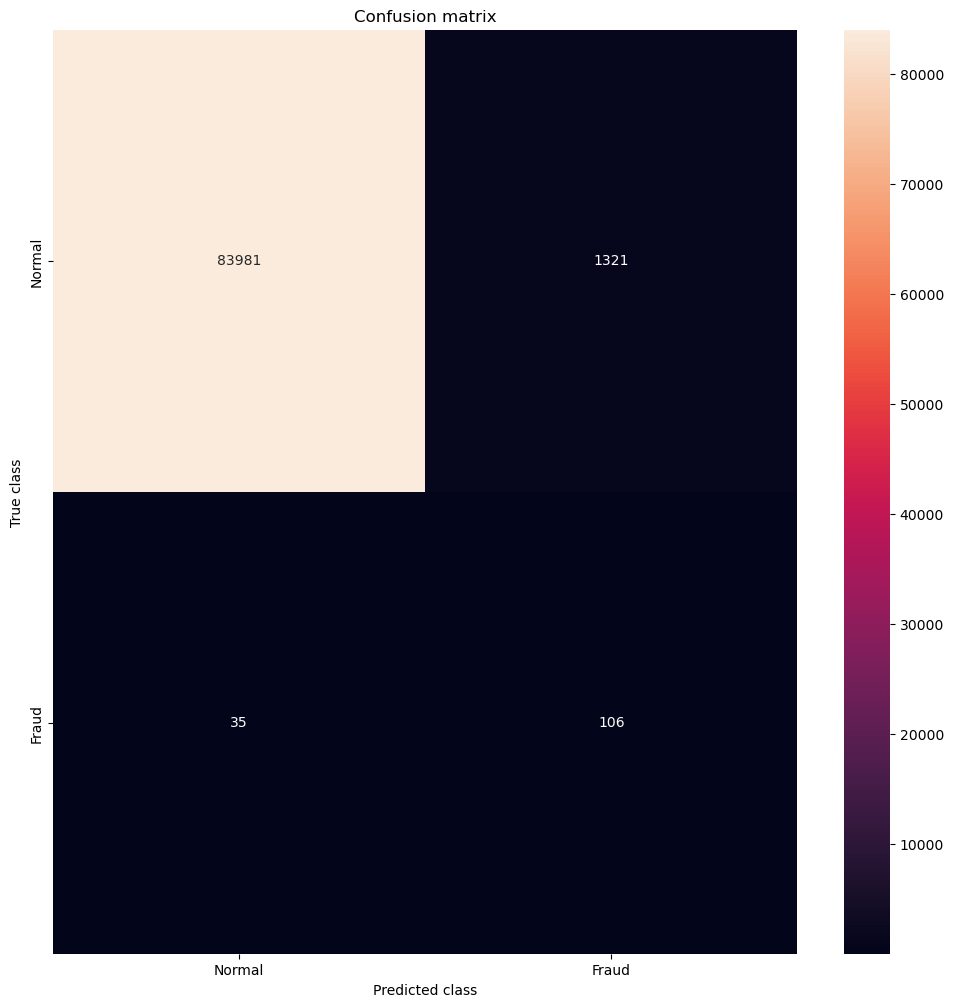

In [101]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
LABELS = ['Normal','Fraud']

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### Visualize the latent space

In [102]:
inp_layer = autoencoder.input
out_layer = autoencoder.layers[2].output

encoder = Model(inputs=inp_layer, outputs=out_layer)

In [103]:
encoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28)]              0         
                                                                 
 dense_8 (Dense)             (None, 14)                406       
                                                                 
 dense_9 (Dense)             (None, 7)                 105       
                                                                 
Total params: 511 (2.00 KB)
Trainable params: 511 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [104]:
fraud = X_test[y_test==1]
normal = X_test[y_test==0]

features = np.append(fraud, normal, axis=0)
labels = np.append(np.ones(len(fraud)), np.zeros(len(normal)))

latent_vector = encoder.predict(features)

2671/2671 [==============================] - 6s 2ms/step


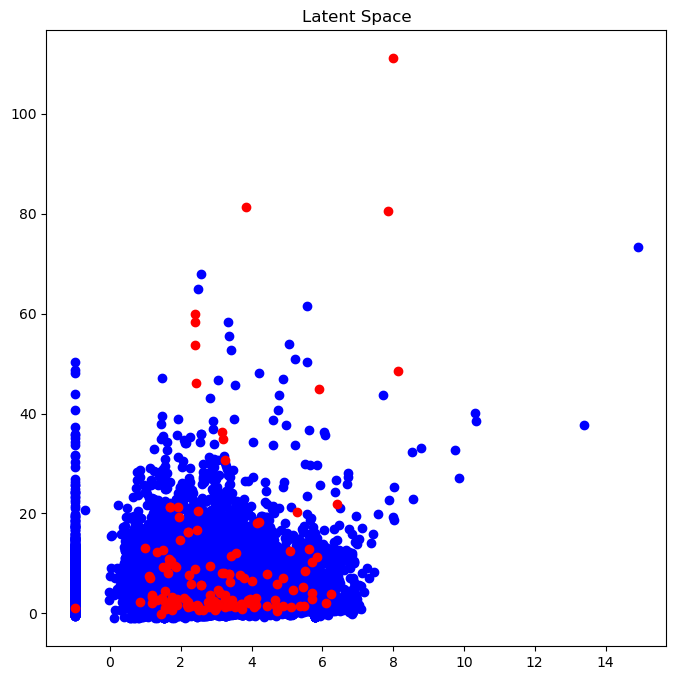

In [105]:
X = latent_vector[:,0]
y = latent_vector[:,1]

plt.subplots(figsize=(8, 8))
plt.scatter(X[labels==0], y[labels==0], color="blue", label='Normal')
plt.scatter(X[labels==1], y[labels==1], color="red", label='Fraud')

plt.title('Latent Space')
plt.show()